In [ ]:
#importar Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#criar dataframe a partir do CSV
df = pd.read_csv("/content/drive/MyDrive/Pós Graduação/Introdução Big Data/horas_estudo.csv", sep=None, engine="python", decimal=',', dtype="float")


df["x_quad"] = df['horas_estudo'] ** 2
df["y_quad"] = df['nota_avaliacao'] ** 2
df["x*y"] = df['horas_estudo'] * df['nota_avaliacao']

somax = df['horas_estudo'].sum()
somay = df['nota_avaliacao'].sum()
somaxquad = df["x_quad"].sum()
somayquad = df["y_quad"].sum()
somaxy = df["x*y"].sum()
cont = (len(df.index)) #contar número de linhas

mediax = df['horas_estudo'].mean()
mediay = df['nota_avaliacao'].mean()

beta = (somaxy-((somax * somay)/cont)) / (somaxquad - ((somax ** 2) / 100))
alfa = mediay - beta * mediax
print(f"O valor de beta é igual a: {beta:.3}")
print(f"O valor de alfa é igual a: {alfa:.3}")

df["res_prev"] = beta * df['horas_estudo'] + alfa
df["erro"] = df['horas_estudo'] - df["res_prev"]
df["quad_erro"] = df["erro"] ** 2
df["x-xmedia"] = df['horas_estudo'] - mediax
df["y-ymedia"] = df['nota_avaliacao'] - mediay
df["xxmedia*yymedia"] = df["x-xmedia"] * df["y-ymedia"]
df["x-xmedia_quad"] = df["x-xmedia"] ** 2
df["y-ymedia_quad"] = df["y-ymedia"] ** 2

somaxymedia = df["xxmedia*yymedia"].sum()
somaxmedia_quad = df["x-xmedia_quad"].sum()
somaymedia_quad = df["y-ymedia_quad"].sum()

coef_r = somaxymedia / (somaxmedia_quad * somaymedia_quad) ** (1/2)
coef_r2 = coef_r ** 2

print (f" O valor de correlação de Poisson é de: {coef_r:.3}")
print (f" O valor de correlação de Poisson ao quadrado é de: {coef_r2:.3}")

df.head()




O valor de beta é igual a: 1.35
O valor de alfa é igual a: 36.1
 O valor de correlação de Poisson é de: 0.66
 O valor de correlação de Poisson ao quadrado é de: 0.435


,horas_estudo,nota_avaliacao,x_quad,y_quad,x*y,res_prev,erro,quad_erro,x-xmedia,y-ymedia,xxmedia*yymedia,x-xmedia_quad,y-ymedia_quad
0,16.07,40.05,258.2449,1604.0025,643.6035,57.870944,-41.800944,1747.318885,-4.696,-24.1726,113.514530,22.052416,584.314591
1,20.41,66.49,416.5681,4420.9201,1357.0609,63.741086,-43.331086,1877.583015,-0.356,2.2674,-0.807194,0.126736,5.141103
2,34.29,91.50,1175.8041,8372.2500,3137.5350,82.514721,-48.224721,2325.623736,13.524,27.2774,368.899558,182.898576,744.056551
3,34.10,87.09,1162.8100,7584.6681,2969.7690,82.257733,-48.157733,2319.167287,13.334,22.8674,304.913912,177.795556,522.917983
4,32.34,69.30,1045.8756,4802.4900,2241.1620,79.877215,-47.537215,2259.786793,11.574,5.0774,58.765828,133.957476,25.779991


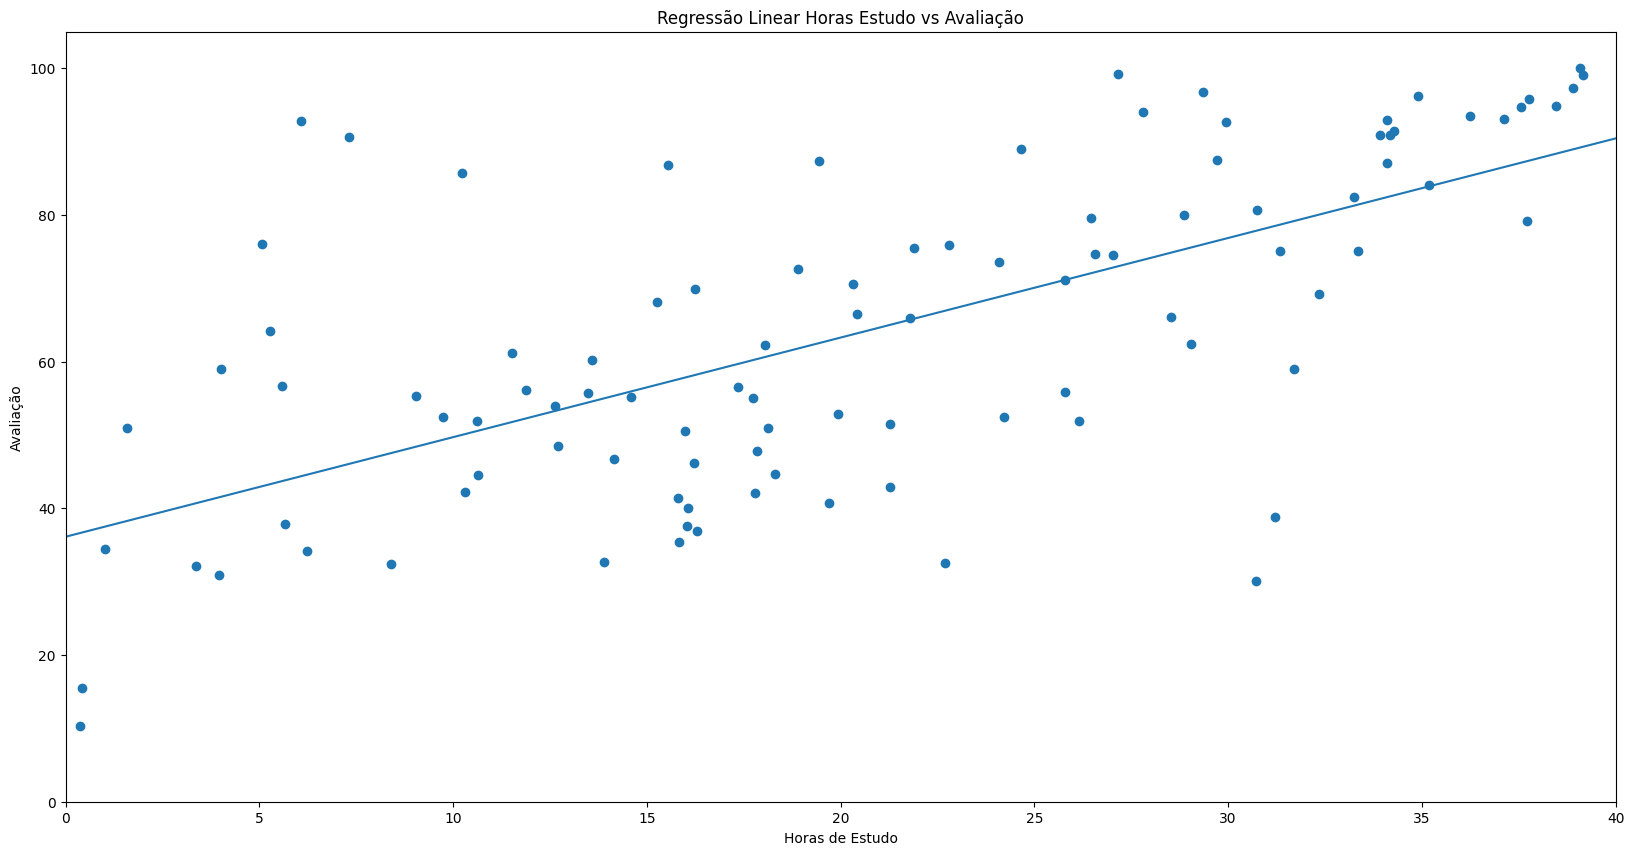

In [ ]:
#Plotar regressão

#Criar coordenadas X e Y da linha de regressão
max = df['horas_estudo'].max() + 1

intercept2 = (max * beta) + alfa

ptx = [0, 40]
pty = [alfa, intercept2]

#Propriedades do gráfico
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(ptx, pty)
ax.scatter(df.horas_estudo, df.nota_avaliacao)
plt.xlabel('Horas de Estudo')
plt.ylabel('Avaliação')
plt.title("Regressão Linear Horas Estudo vs Avaliação")
plt.axis((0, 40, 0, 105))
plt.show()